## Explore

### Main Steps

**Hypothesize**
- Ask questions of the data. For example, does higher horsepower equal less mpg?

**Visualize**
- Plot distribution of each feature. Check for normal distribution. This can be done before splitting the data.
- Plot the interaction of two or more variables. Can only be done AFTER splitting the data.
- See how specific groups compare to others/overall population.
- Document takeaways.
- Check for collinearity between features. Carry on with the feature that has the strongest relationship to the target variable.

**Test hypothesis**
- Use the appropriate statistical test and document the results.

In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import wrangle as w
import prepare as prep
import acquire as a

from scipy.stats import pearsonr, spearmanr

from scipy import stats



In [2]:
df = a.get_auto_mpg()

In [3]:
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   displ       392 non-null    float64
 3   horsepower  392 non-null    float64
 4   weight      392 non-null    float64
 5   acc         392 non-null    float64
 6   model_year  392 non-null    int64  
 7   origin      392 non-null    int64  
 8   name        392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [5]:
cont_var = ['mpg', 'displ', 'horsepower', 'weight', 'acc']

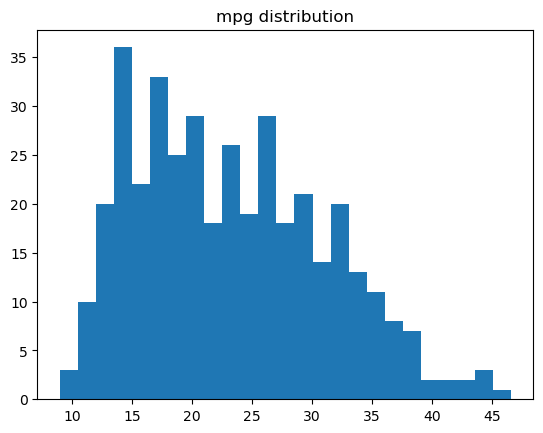

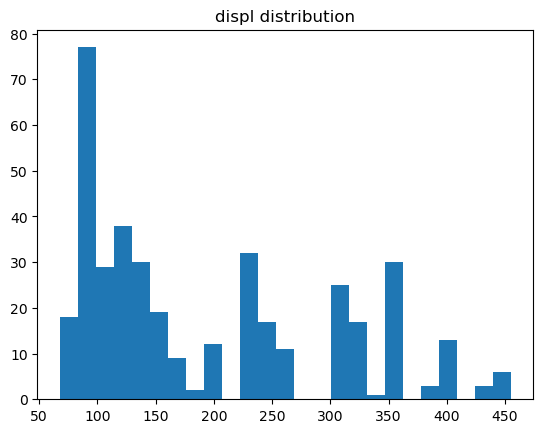

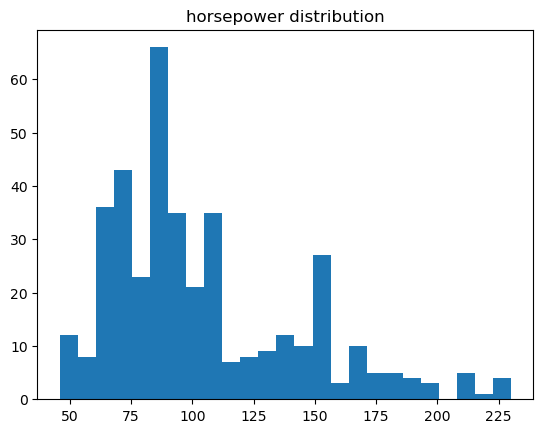

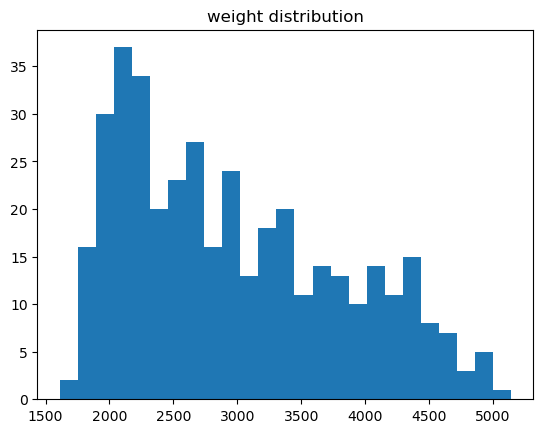

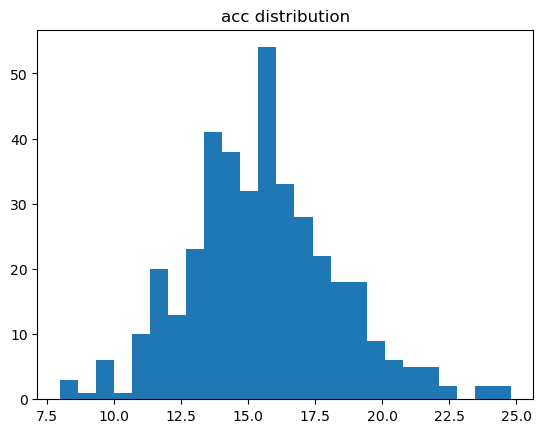

In [6]:
for col in cont_var:
    
    plt.hist(df[col], bins=25)
    plt.title(f'{col} distribution')
    plt.show()

Acceleration and mpg are normally distributed.

Displacment, horsepower, and weight are NOT normally distributed.

In [7]:
df['name'].nunique()

301

In [8]:
df['model_year'].nunique(), df['origin'].nunique()

(13, 3)

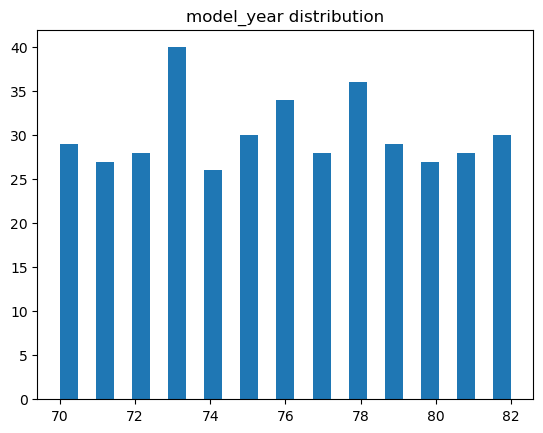

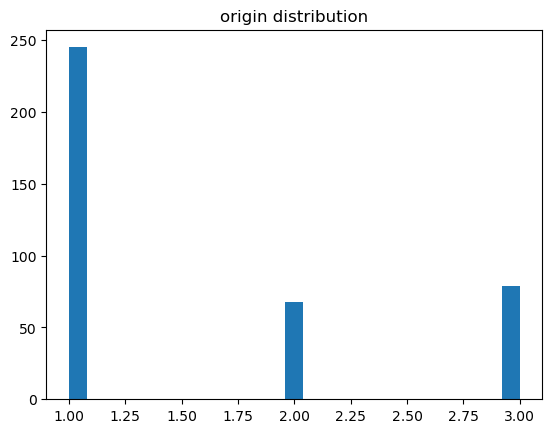

In [9]:
for col in ['model_year', 'origin']:
    
    plt.hist(df[col], bins=25)
    plt.title(f'{col} distribution')
    plt.show()

Model year is a uniform distribution from years 1970 - 1982.

The origin distribution is skewed, with many cars coming origin 1.

In [14]:
train, val, test = p.train_val_test_split(df)
train.shape, val.shape, test.shape

((235, 9), (78, 9), (79, 9))

In [15]:
train_corr = train[cont_var].corr(method='spearman')

<AxesSubplot:>

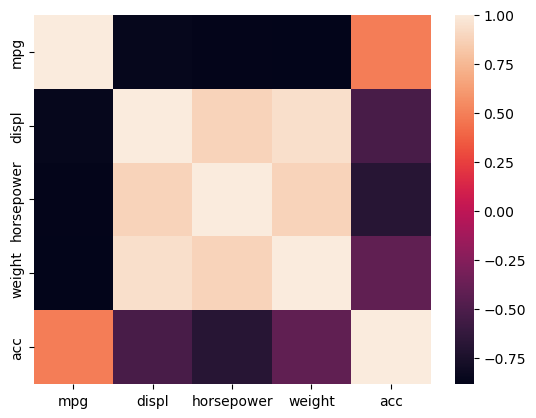

In [16]:
sns.heatmap(train_corr)

Displacement, horsepower, and weight all show a strong negative correlation with mpg.

Acceleration and mpg have a moderate positive correlation.

There is a strong positive correlation between displacement, horsepower and weight.

There is a moderate negative correlation between acceleration and (displacement, horsepower, and weight).

It would be important the spearmanr results between (displacement, horsepower and weight) and mpg to see which feature has the strongest correlation with the target variable (mpg).

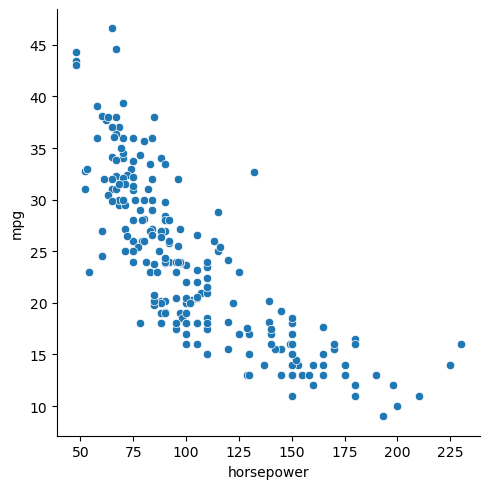

In [17]:
sns.relplot(x='horsepower', y='mpg', data=train)

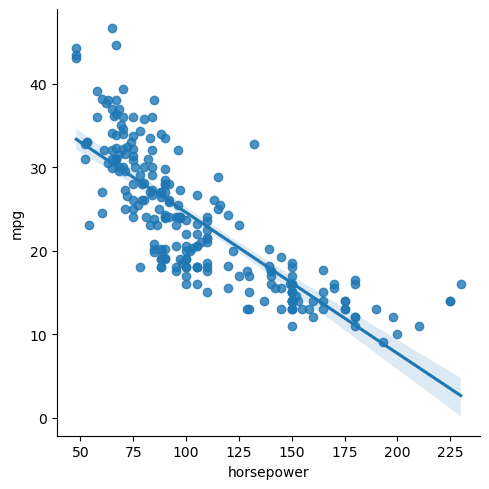

In [18]:
sns.lmplot(x='horsepower', y='mpg', data=train)

There is a strong negative correlation between horsepower and mpg, but it is clearly not linear.

<AxesSubplot:xlabel='origin', ylabel='mpg'>

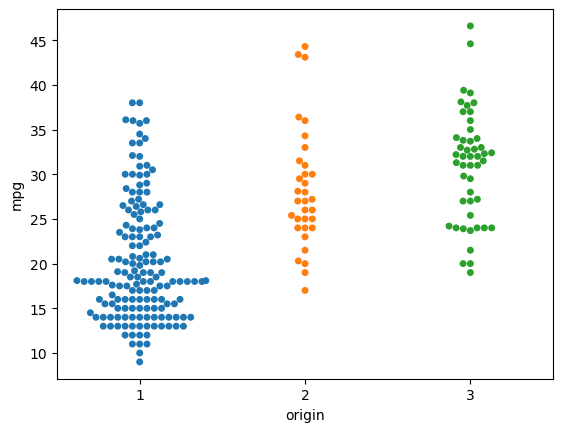

In [19]:
sns.swarmplot(x='origin', y='mpg', data=train)

Origin 1 appears to make cars with lower mpg. I would use a one-sample t-test to compare the mpg of origin 1 cars to the overall mean in the train dataset.

Null hypothesis: The mpg for origin 1 cars is greater than or equal to the overall average mpg.

Alternate hypothesis: The mpg for origin cars is less than the overall average.

In [25]:
t, p = stats.ttest_1samp(train[train['origin'] == 1]['mpg'], train['mpg'].mean())

In [26]:
alpha = .05

if t < 0 and p/2 < alpha:
    print('Reject null hypothesis.')
else:
    print('Fail to reject null hypothesis.')

Reject null hypothesis.


In [31]:
train[train['origin'] == 1]['mpg'].mean()

20.1487012987013

In [28]:
train['mpg'].mean()

23.503829787234046

The test rejected the null hypothesis, origin 1 cars have significantly less mpg than the overall average.

# Exercises

- As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.


In [56]:
df = w.wrangle_zillow()
df.shape

(2130214, 7)

In [58]:
df, var_fences = prep.remove_outliers(df)

fips column ignored


In [59]:
df.shape

(1880055, 7)

In [61]:
df.head()

,bed,bath,sqft,tax_value,year,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0


In [54]:
df['bed'].nunique(), df['bath'].nunique()

(4, 10)

In [112]:
cont_vars = ['sqft', 'tax_value','taxamount']

In [96]:
cat_vars = ['bed','bath','year','fips']

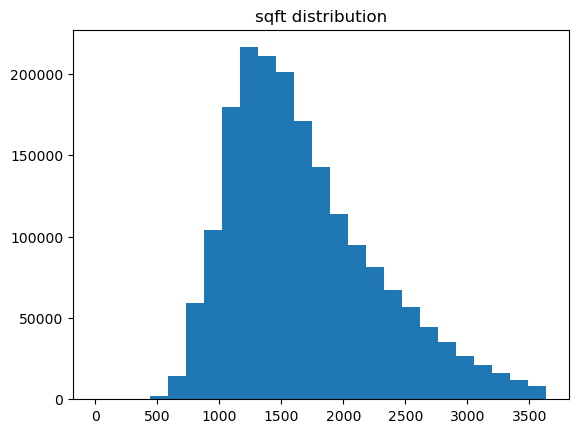

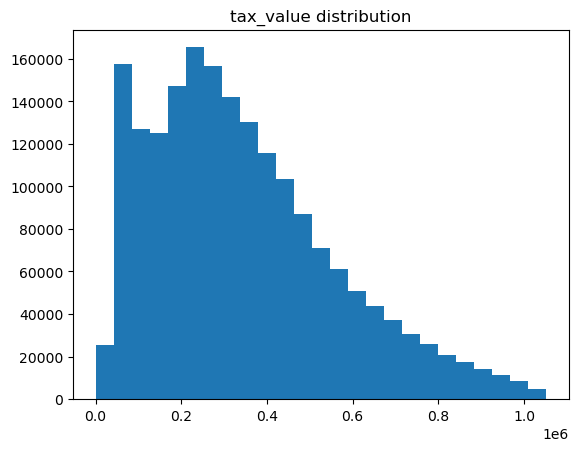

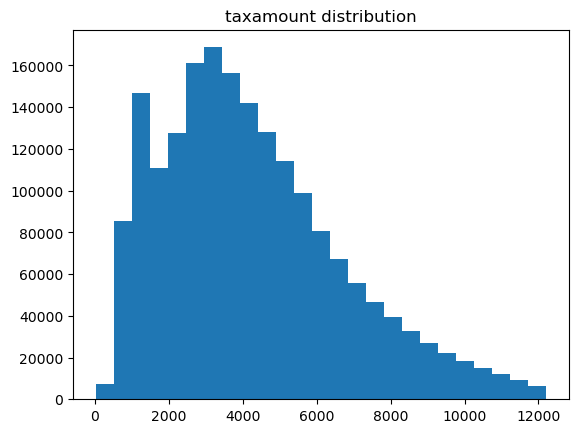

In [97]:
for col in cont_vars:
    plt.hist(df[col], bins=25)
    plt.title(f'{col} distribution')
    plt.show()

The sqft, tax_value and taxamount are all slightly skewed to the left.

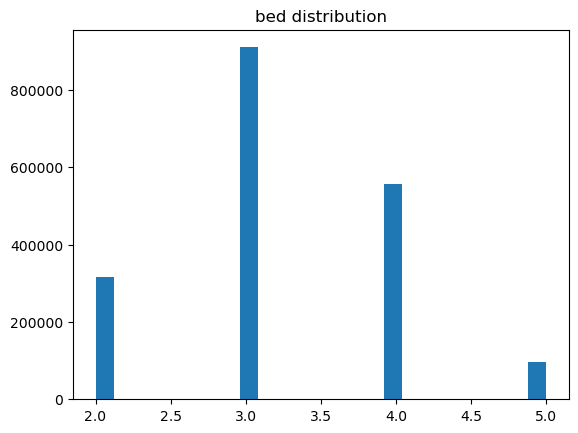

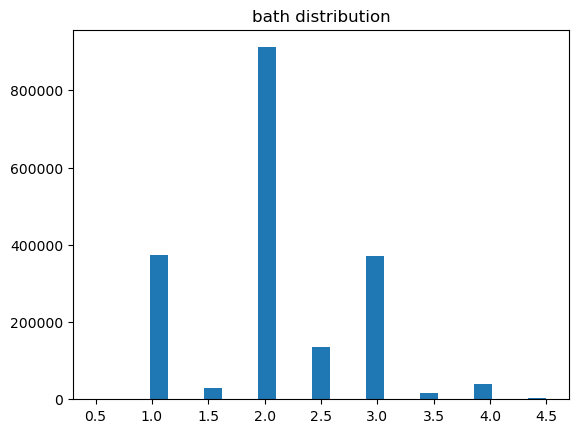

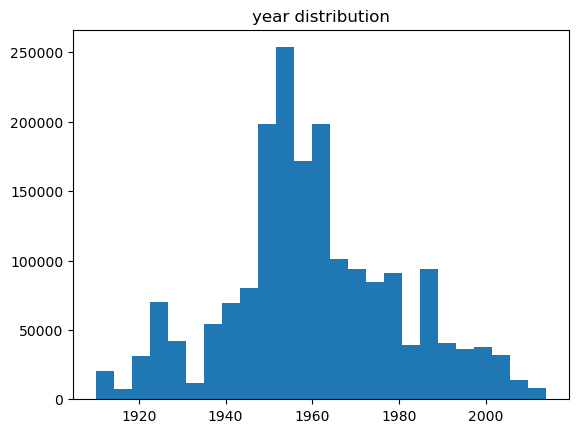

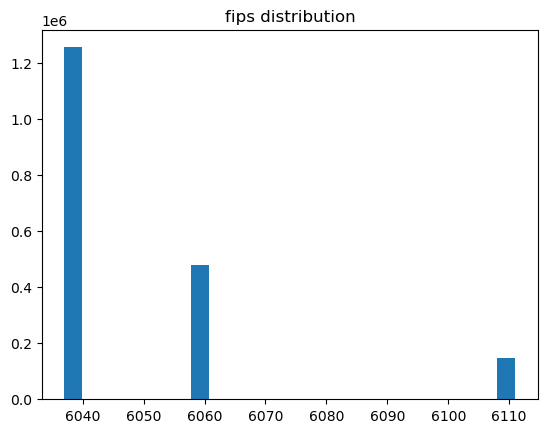

In [98]:
for col in ['bed','bath','year','fips']:
    plt.hist(df[col], bins=25)
    plt.title(f'{col} distribution')
    plt.show()

The bed, bath and fips distribution has no recognizable distribution. The bed has a large count at 3, the bath has a large count at 2 and the fips has a large count at 6040.

The year is a fairly normal distribution.

- Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [99]:
train, val, test = prep.train_val_test_split(df)
train.shape, val.shape, test.shape

((1128033, 7), (376011, 7), (376011, 7))

In [100]:
train_corr = train[cont_vars].corr(method='spearman')

<AxesSubplot:>

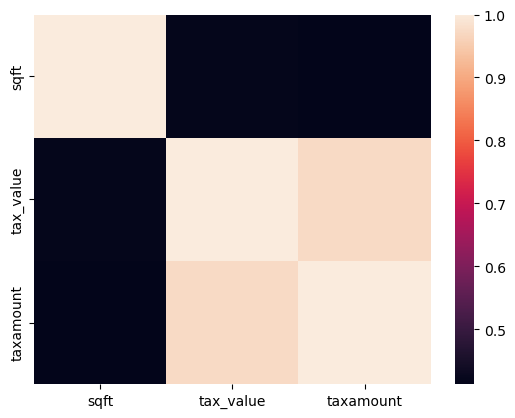

In [101]:
sns.heatmap(train_corr)

There is a very low relationship between sqft and (tax_value and taxamount).

There is a very strong relationship between tax_value and tax amount.

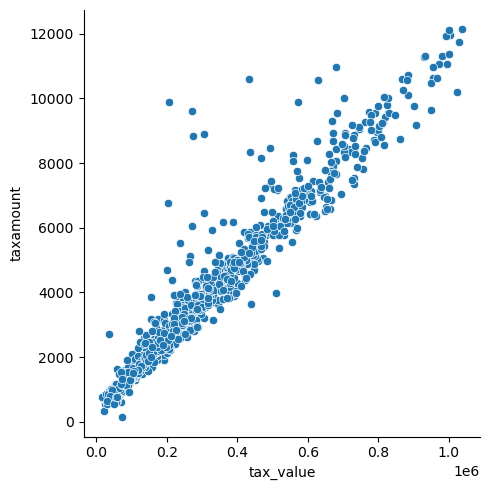

In [102]:
sns.relplot(x='tax_value', y='taxamount', data=train.sample(1000))

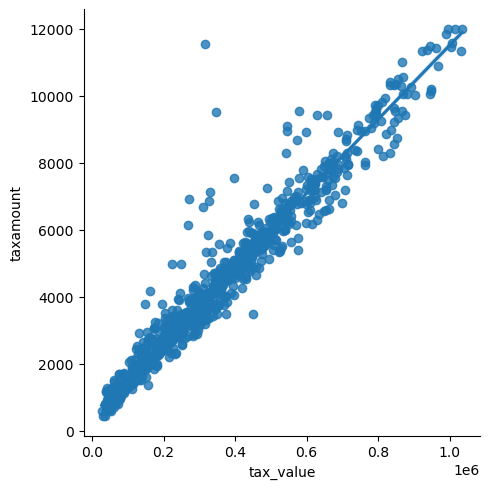

In [103]:
sns.lmplot(x='tax_value', y='taxamount', data=train.sample(1000))

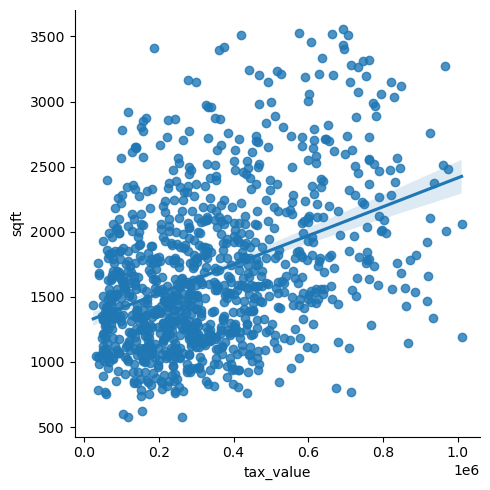

In [104]:
sns.lmplot(x='tax_value', y='sqft', data=train.sample(1000))

- Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.


In [105]:
def plot_variable_pairs(train):
    sns.pairplot(data=train.sample(2000), diag_kind='hist', kind='reg')
    plt.show()

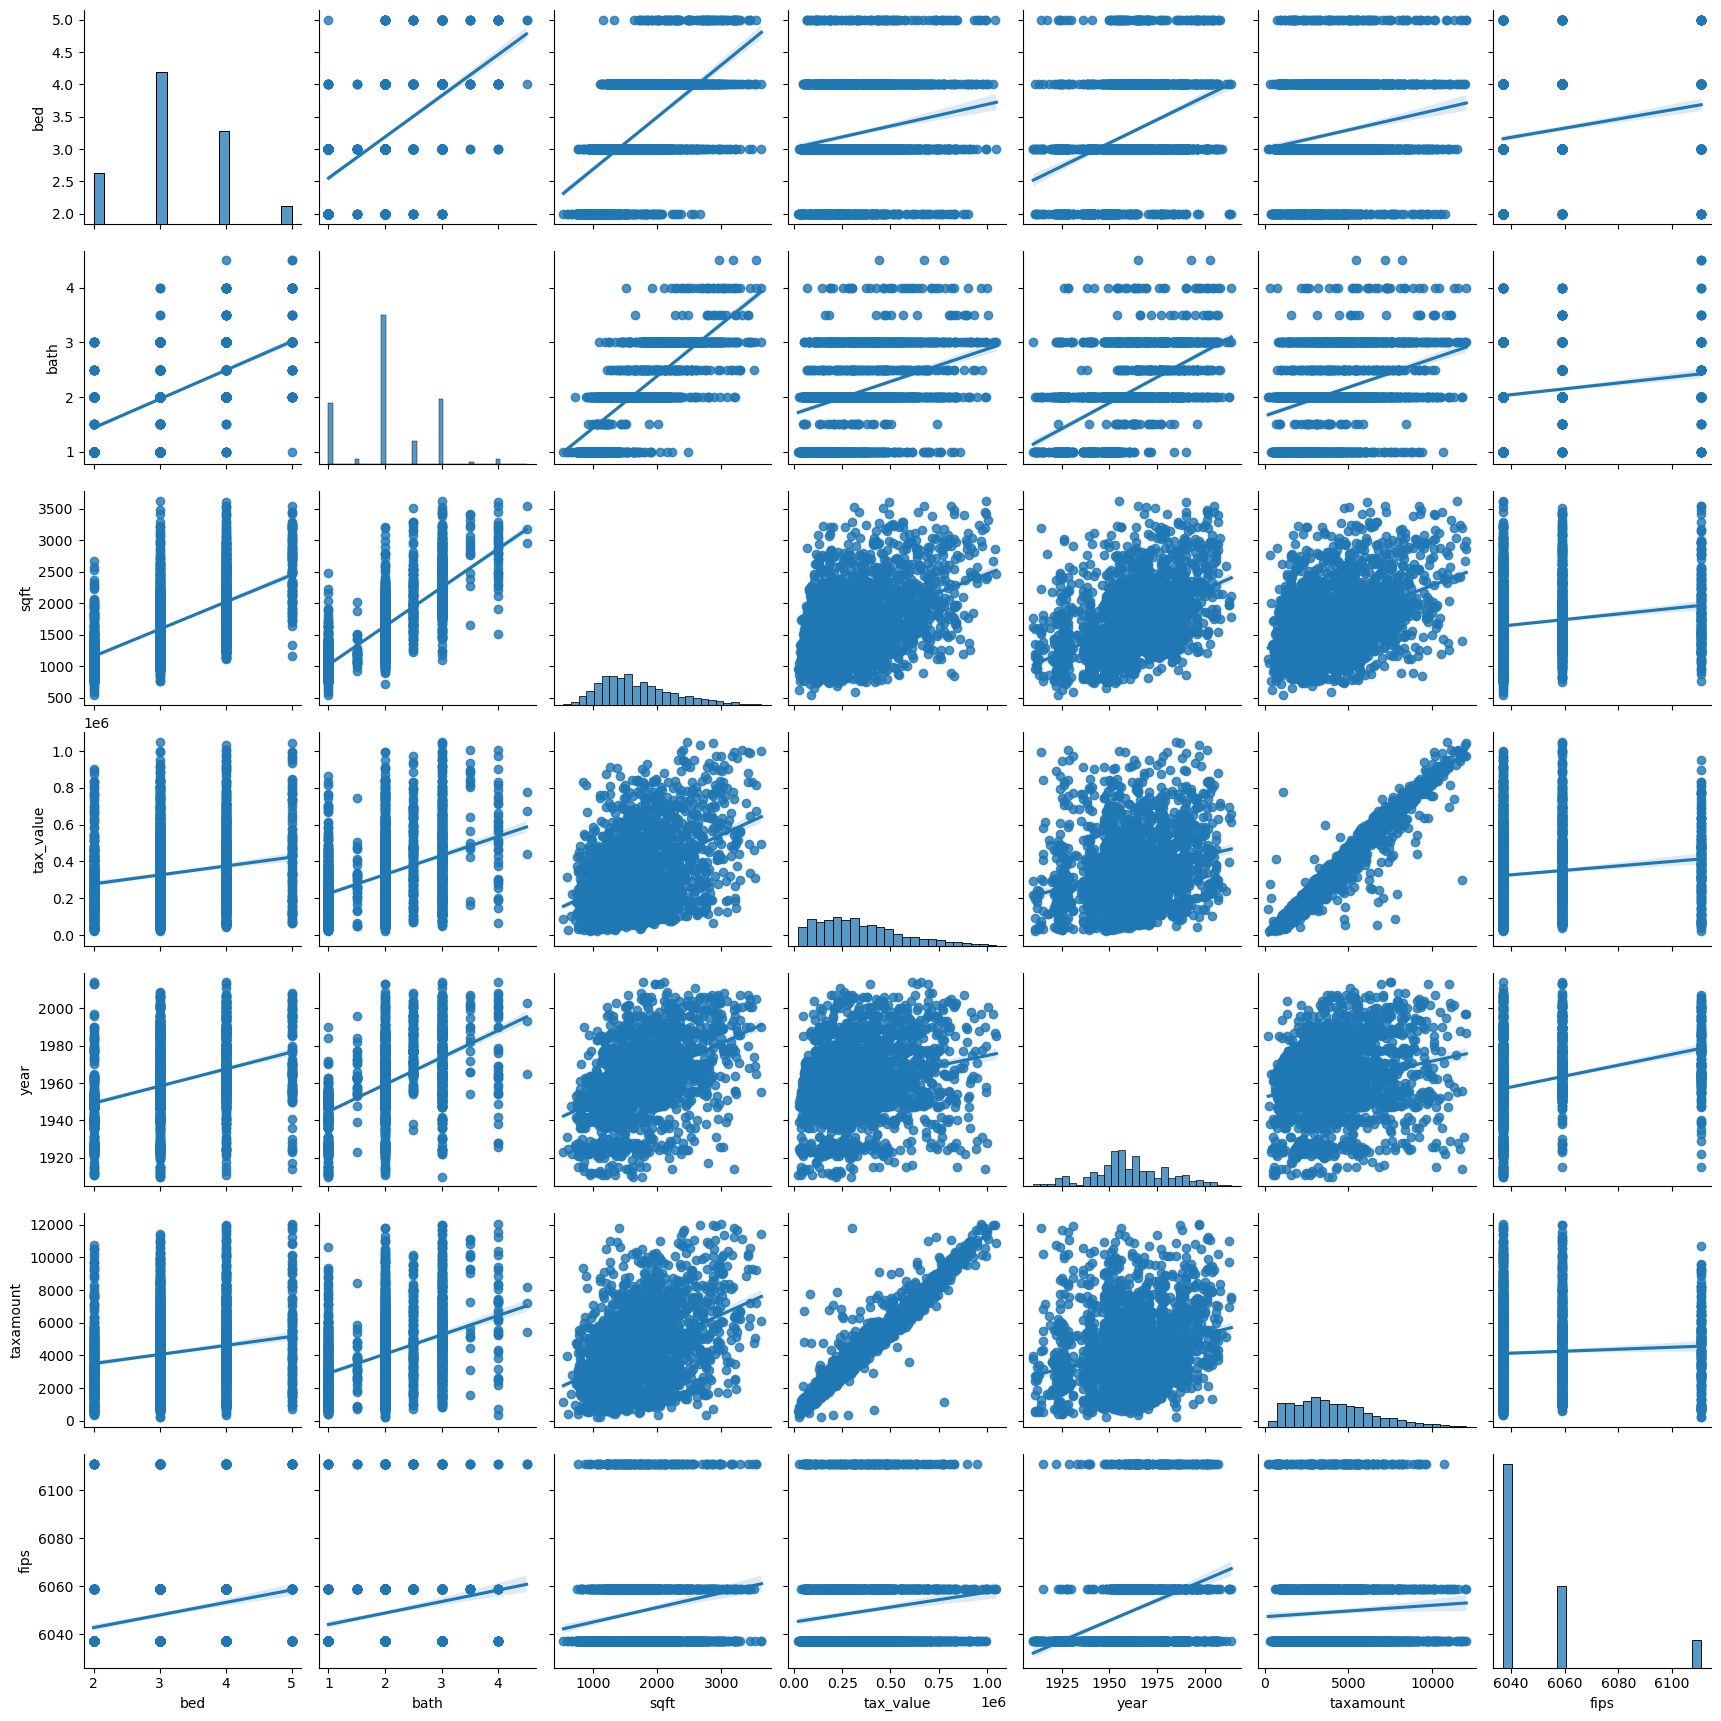

In [106]:
plot_variable_pairs(train)

- Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.


In [175]:
def plot_categorical_and_continuous_vars(train, cont_vars, cat_vars):
    train_corr = train[cont_vars].corr(method='spearman')
    sns.heatmap(train_corr)
    plt.show()
    
    for col in cont_vars:
        sns.lmplot(x='tax_value', y=col, data=train.sample(1000))
        plt.show()
    
    for col in cat_vars:
        sns.stripplot(x=col, y='tax_value', data=train.sample(1000))
        plt.show()
    
    for col in cat_vars:
        sns.boxplot(x=col, y='tax_value', data=train.sample(1000))
        plt.show()
    

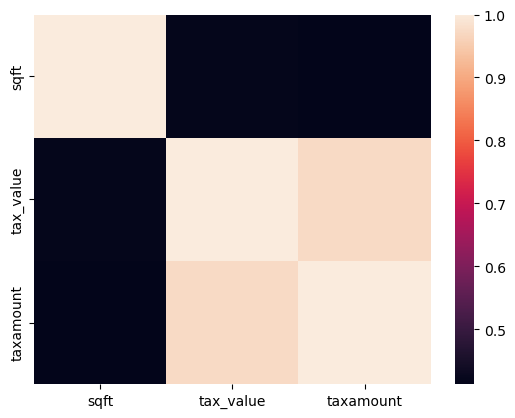

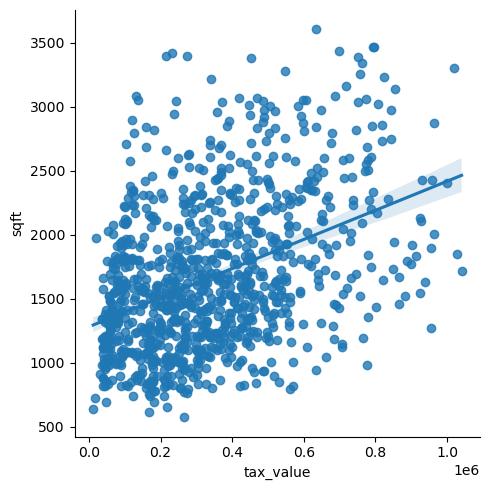

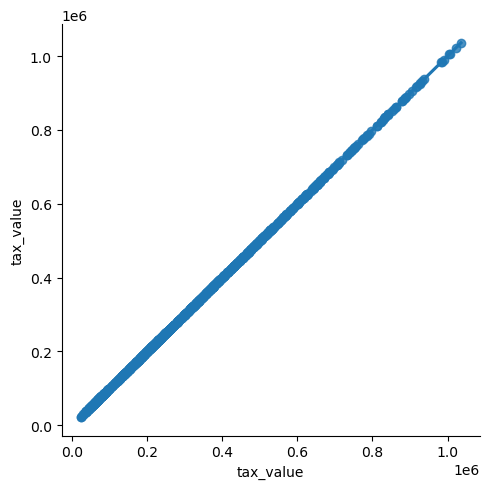

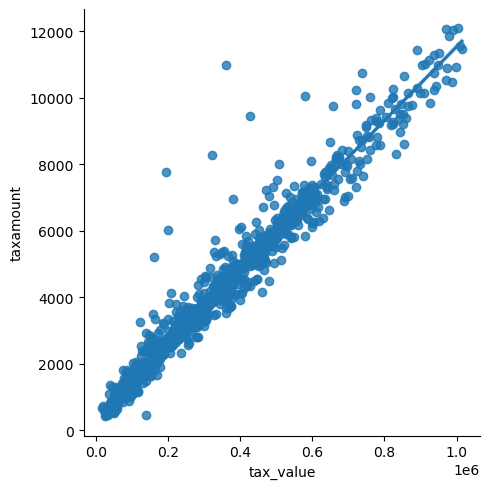

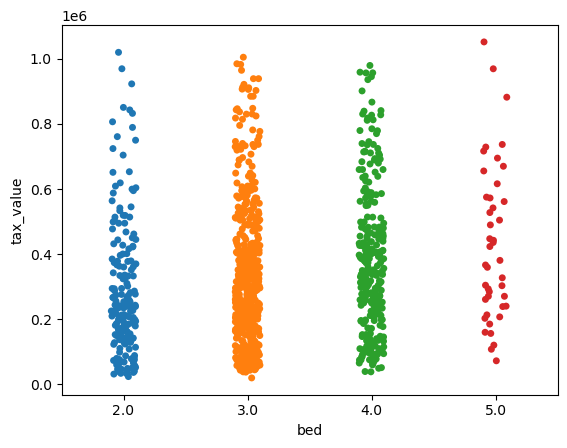

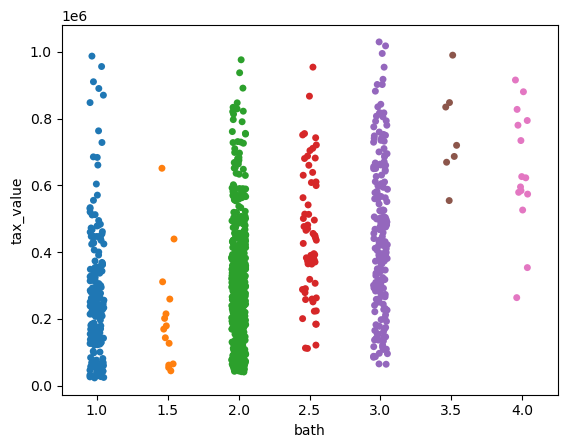

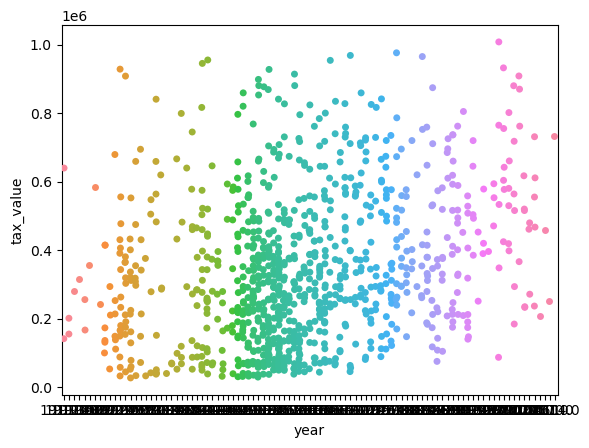

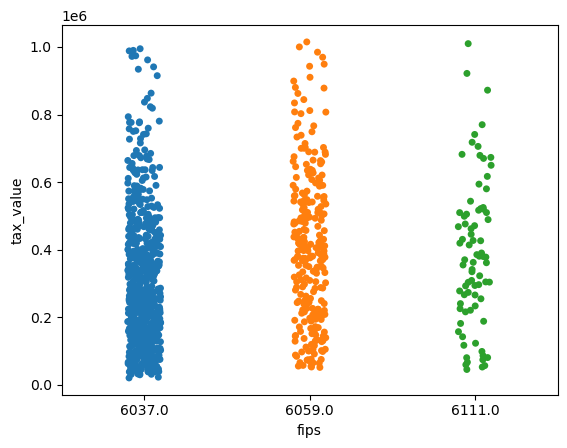

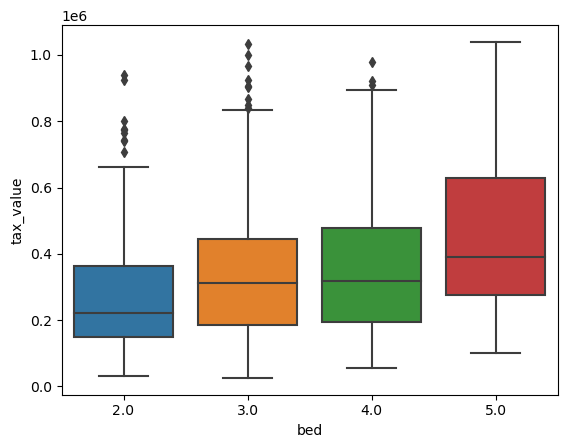

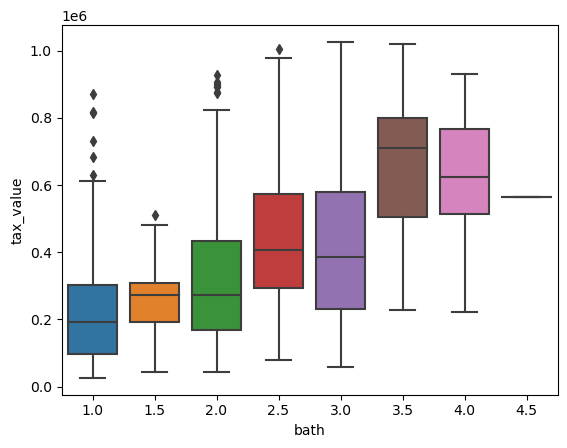

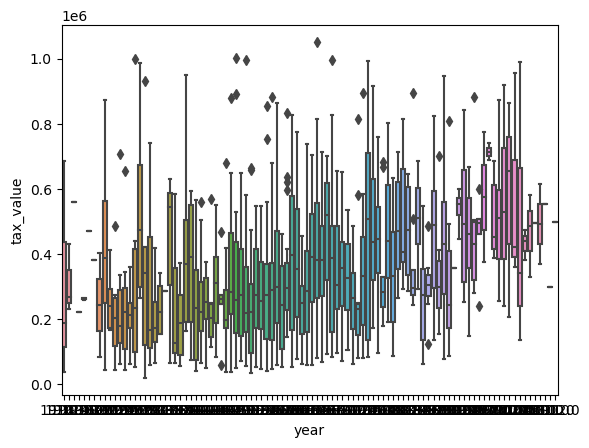

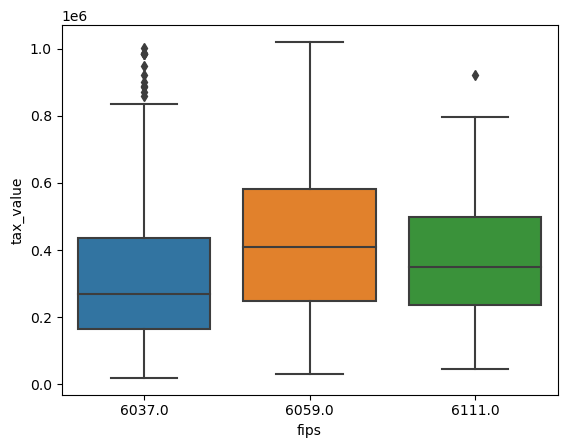

In [176]:
plot_categorical_and_continuous_vars(train, cont_vars, cat_vars)

- Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.


- Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.


- Come up with some initial hypotheses based on your goal of predicting property value.


The more the sqft increases the higher the cost of the property.
The more bedrooms there are the higher the cost of the property.
The more bathrooms there are the higher the cost of the property.

- Visualize all combinations of variables in some way.


- Run the appropriate statistical tests where needed.


In [143]:
for col in cont_vars:
    
    r, p = stats.pearsonr(train[col], train['tax_value'])
    
    print(col)
    print(f'r = {r}   p = {p}')

sqft
r = 0.4563698383736001   p = 0.0
tax_value
r = 0.9999999999999993   p = 0.0
taxamount
r = 0.970326390491099   p = 0.0


In [144]:
for col in cont_vars:
    
    r, p = stats.spearmanr(train[col], train['tax_value'])
    
    print(col)
    print(f'r = {r}   p = {p}')

sqft
r = 0.41732681092139806   p = 0.0
tax_value
r = 0.9999999999999998   p = 0.0
taxamount
r = 0.9739892675237898   p = 0.0


In [145]:
train.head()

,bed,bath,sqft,tax_value,year,taxamount,fips
756336,4.0,2.0,1592.0,346902.0,1948.0,5036.54,6037.0
1095910,3.0,2.0,1588.0,354034.0,1958.0,4368.08,6059.0
106772,3.0,2.0,1642.0,650127.0,1973.0,6526.70,6059.0
1196814,2.0,1.0,1237.0,216472.0,1942.0,3177.45,6037.0
1671272,3.0,2.0,1158.0,267315.0,1932.0,4063.08,6037.0


In [161]:
over_three = train[train['bed'] >= 3].tax_value
under_three = train[train['bed'] < 3].tax_value

<AxesSubplot:>

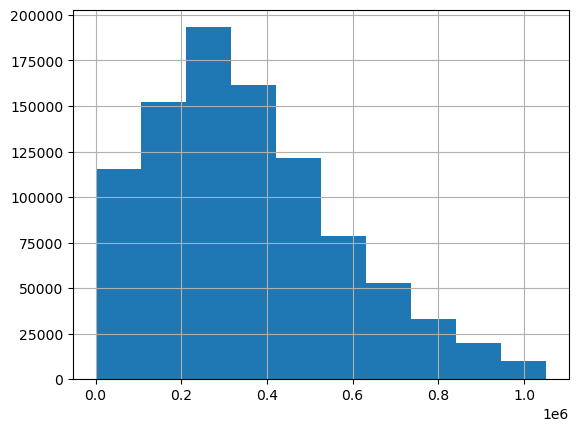

In [162]:
over_three.hist()

<AxesSubplot:>

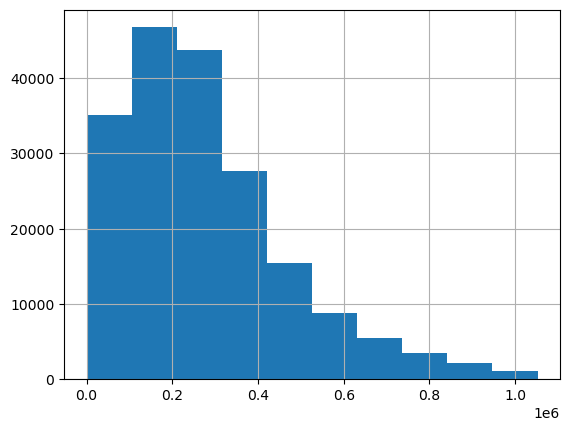

In [163]:
under_three.hist()

In [165]:
print(over_three.var())
print(under_three.var())

47292191500.19418
37596282086.07909


Null hypothesis: Mean tax value of houses with 3 or more bedrooms is less than or equal to mean tax value of houses with less than 3 bedrooms

Alternate hypothesis: Mean tax value of houses with 3 or more bedrooms is greater than the mean tax value of houses with less than 3 bedrooms

In [167]:
t, p = stats.ttest_ind(over_three, under_three, equal_var=False)
t, p 

(156.64467643483292, 0.0)

In [168]:
if p/2 > alpha and t < 0:
    print('Fail to reject the null')
else:
    print('Reject the null')

Reject the null


According to the 2 sample t-test the average tax value for houses with 3 or more bedrooms is significantly higher than the average tax value of houses with less than 3 bedrooms.

In [174]:
over_two = train[train['bath'] >= 2].tax_value
under_two = train[train['bath'] < 2].tax_value

Null hypothesis: Mean tax value of houses with 2 or more bathrooms is less than or equal to mean tax value of houses with less than 2 bathrooms

Alternate hypothesis: Mean tax value of houses with 2 or more bathrooms is greater than the mean tax value of houses with less than 2 bathrooms

In [171]:
print(over_two.var())
print(under_two.var())

48358006851.07986
27485758970.369576


In [172]:
t, p = stats.ttest_ind(over_two, under_two, equal_var=False)
t, p 

(305.33530940956797, 0.0)

In [173]:
if p/2 > alpha and t < 0:
    print('Fail to reject the null')
else:
    print('Reject the null')

Reject the null


According to the 2 sample t-test the average tax value for houses with 2 or more bathrooms is significantly higher than the average tax value of houses with less than 2 bathrooms.

- What independent variables are correlated with the dependent variable, home value?


Tax amount, tax value, sqft, bedrooms, bathrooms,

- Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?


- Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.


- Explore your dataset with any other visualizations you think will be helpful.